# Heatmap

In [1]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set()

In [2]:
DATA_DIR = "../input/commonlit-evaluate-student-summaries/"
DATA_DIR = "../data/"

prompts_train = pd.read_csv(DATA_DIR + "prompts_train.csv")
train = pd.read_csv(DATA_DIR + "summaries_train.csv")

In [5]:
trfeat = pd.read_parquet("tmp_train_preprocessed.parquet")
trcos = pd.read_parquet("tmp_train_cossim.parquet")

In [4]:
feat = trfeat.drop(["prompt_id", "text", "content", "wording", "fixed_summary_text", "prompt_question", "prompt_title", "fold", "prompt_text", 
             "_llama2_summ", "full_prompt", "short_prompt", "bleurt", "bleurt_ref", "bleurt_ref_fs",
             'ap_bleurt', 'ap_bleurt_fs', 'ap_bleurt_ref',
             'ap_bleurt_ref_fs'], 
            axis=1)

In [9]:
train = train.merge(feat, on="student_id", how="left")
train = train.merge(trcos.drop(["prompt_id", "text", "content", "wording"],axis=1), on="student_id", how="left")

In [10]:
train.head(2)

,student_id,prompt_id,text,content,wording,cs_text,cs_question,stext_words,stext_chars,ptext_words,...,word_overlap_count,bigram_overlap_count,bigram_overlap_ratio,trigram_overlap_count,trigram_overlap_ratio,quotes_count,bleurt_fs,word_overlap_ratio,perplexity,log_perplexity
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,0.759260,0.720335,61,346,596,...,14,4,0.063492,0,0.000000,0,-1.263821,0.218750,34572.480469,10.450813
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,0.488938,0.617430,52,244,966,...,18,22,0.415094,10,0.192308,0,-1.242914,0.333333,41174.566406,10.625576


In [11]:
train.columns

Index(['student_id', 'prompt_id', 'text', 'content', 'wording', 'cs_text',
       'cs_question', 'stext_words', 'stext_chars', 'ptext_words',
       'ptext_chars', 'ratio_words', 'ratio_chars', 'summary_length',
       'splling_err_num', 'prompt_length', 'length_ratio',
       'word_overlap_count', 'bigram_overlap_count', 'bigram_overlap_ratio',
       'trigram_overlap_count', 'trigram_overlap_ratio', 'quotes_count',
       'bleurt_fs', 'word_overlap_ratio', 'perplexity', 'log_perplexity'],
      dtype='object')

In [12]:
train.head(2)

,student_id,prompt_id,text,content,wording,cs_text,cs_question,stext_words,stext_chars,ptext_words,...,word_overlap_count,bigram_overlap_count,bigram_overlap_ratio,trigram_overlap_count,trigram_overlap_ratio,quotes_count,bleurt_fs,word_overlap_ratio,perplexity,log_perplexity
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,0.759260,0.720335,61,346,596,...,14,4,0.063492,0,0.000000,0,-1.263821,0.218750,34572.480469,10.450813
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,0.488938,0.617430,52,244,966,...,18,22,0.415094,10,0.192308,0,-1.242914,0.333333,41174.566406,10.625576


In [7]:
train["n_sum_sent"] = train.text.apply(lambda x: len(sent_tokenize(x, language='english')))

In [11]:
prompts_train["n_sent"] =  prompts_train.prompt_text.apply(lambda x: len(sent_tokenize(x, language='english')))

In [14]:
train = train.merge(prompts_train[["prompt_id", "n_sent"]], on="prompt_id", how="left")

In [15]:
train["ratio_sent_size"] = train.n_sum_sent / train.n_sent

In [12]:
prompts_train[["prompt_id", "n_sent"]]

,prompt_id,n_sent
0,39c16e,25
1,3b9047,44
2,814d6b,25
3,ebad26,23


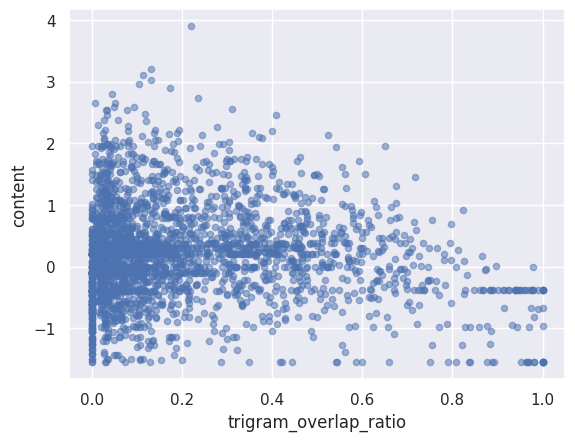

In [44]:
train[train.ratio_sent_size.between(0.1,0.2)].plot.scatter(x="trigram_overlap_ratio", y="content", alpha=0.5);

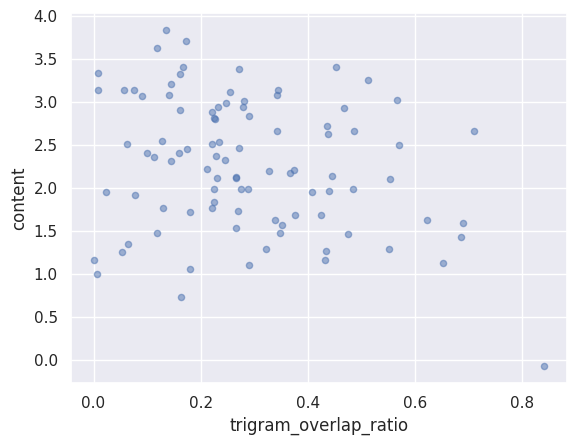

In [45]:
train[train.ratio_sent_size.between(0.4,0.5)].plot.scatter(x="trigram_overlap_ratio", y="content", alpha=0.5);

In [54]:
pt = pd.pivot_table(train, index="prompt_id", columns="n_sum_sent", values="content", aggfunc="mean")

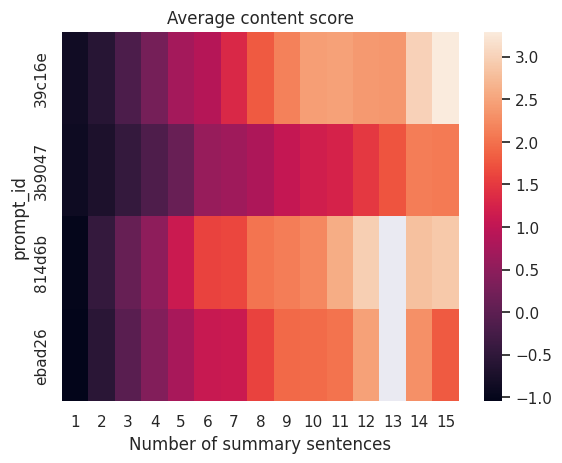

In [55]:
ax = sns.heatmap(pt);
ax.set_title("Average content score")
ax.set_xlabel("Number of summary sentences");

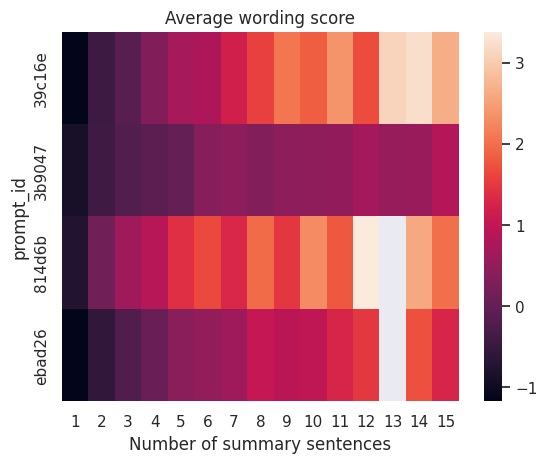

In [56]:
pt = pd.pivot_table(train, index="prompt_id", columns="n_sum_sent", values="wording", aggfunc="mean")

ax = sns.heatmap(pt);
ax.set_title("Average wording score")
ax.set_xlabel("Number of summary sentences");

In [46]:
train.text.values[0]

'The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader'

## Heatmap



Size Ratio Slider, Bleurt Y, CosSim X, Content color

In [52]:
dx["wording"].max()

4.3106931513921

In [35]:
cols = ["student_id", "prompt_id", "content", "wording", "length_ratio", "bigram_overlap_ratio",
       "trigram_overlap_ratio", "word_overlap_ratio", "bleurt_fs", 
       'cs_text',
       'cs_question', 'stext_words', 'stext_chars', 'ptext_words',
       'ptext_chars', 'ratio_words', 'ratio_chars']
dx = train[cols].copy()

In [36]:
dx.loc[dx.length_ratio.gt(0.6), "length_ratio"] = 0.6

In [15]:
#MinMaxScaler().fit_transform(dx.bleurt_fs.values.reshape(-1, 1)).flatten()

In [88]:
#dx["bleurt_n"] = MinMaxScaler().fit_transform(dx.bleurt_fs.values.reshape(-1, 1)).flatten()

In [37]:
# binarize variables
cols = ["bigram_overlap_ratio",
       "trigram_overlap_ratio", "word_overlap_ratio", "bleurt_fs", 'cs_text',
       'cs_question']
for c in cols:
    bcut, bcc =  pd.cut(dx[c], 10, retbins=True)
    dx[c] = [np.round(v.right,2) for v in bcut]

In [38]:
bcut, bcc =  pd.cut(dx["length_ratio"], bins=np.linspace(0,0.6,13), retbins=True)
dx["length_ratio"] = [np.round(v.right,2) for v in bcut]

In [53]:
dx["cs_question"].value_counts()

0.71    1967
0.62    1621
0.80    1227
0.53     953
0.44     563
0.35     370
0.89     224
0.26     170
0.18      58
0.09      12
Name: cs_question, dtype: int64

In [40]:
# Export data for streamlit heatmap
dx.to_parquet("../simpleheatmap/data.parquet", index=False)

In [93]:

#bcut, bcc =  pd.cut(dx.bleurt_n, 10, retbins=True)
#wcut, wcc = pd.cut(dx.word_overlap_ratio, 10, retbins=True)

In [ ]:
#bcc_map = {v:idx for idx,v in enumerate(np.round(bcc, 2))}
#wcc_map = {v:idx for idx,v in enumerate(np.round(wcc, 2))}

#dx["bleurt_c"] = [bcc_map[np.round(v.right,2)] for v in bcut]
#dx["word_overlap_ratio_c"] = [wcc_map[np.round(v.left,2)] for v in wcut]

In [17]:
#dx["bleurt_c"] = [np.round(v.right,2) for v in bcut]
#dx["word_overlap_ratio_c"] = [np.round(v.right,2) for v in wcut]

In [44]:
pt = pd.pivot_table(dx, index="bleurt_fs", columns="cs_question", 
                        values="content", aggfunc="mean")
pt.min().min(), pt.max().max()

(-1.54716321678788, 3.20372939449899)

In [47]:
index_vals = pt.index
col_vals = pt.columns

def expand_cols(df, cols, fillvalue=None):
    for c in cols:
        if c not in df.columns:
            df[c] = fillvalue
    df = df[cols]
    return df

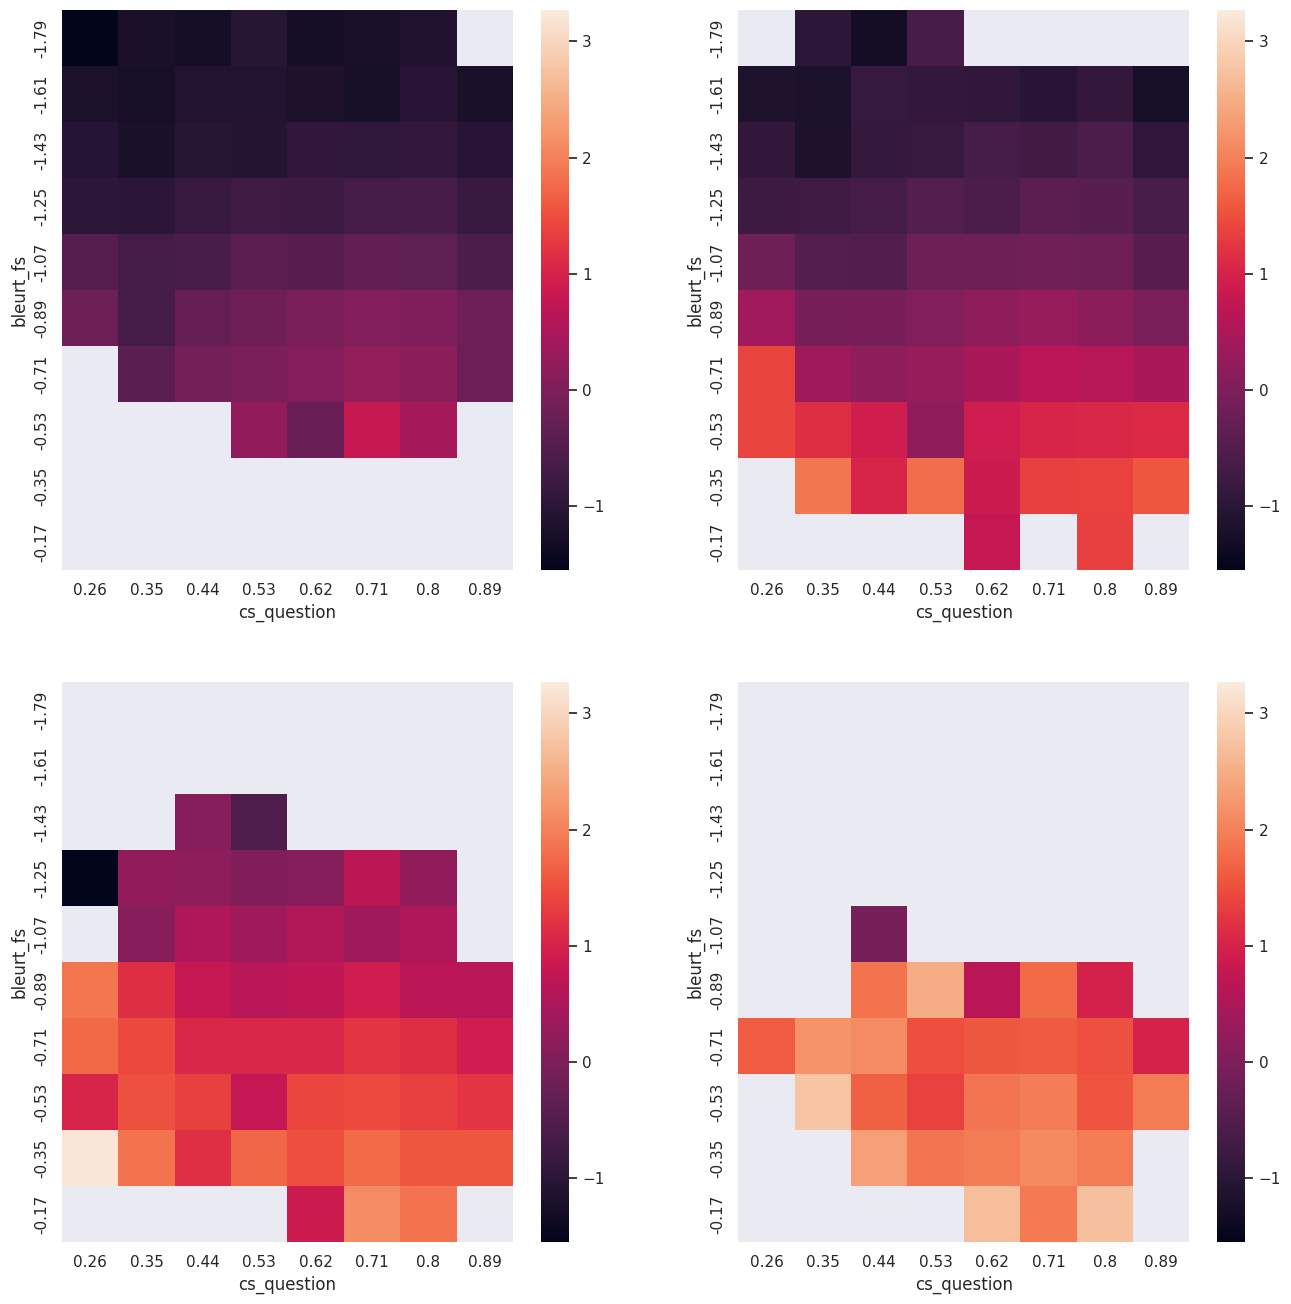

In [50]:
_, ax = plt.subplots(2,2, figsize=(16,16)) 
ax = ax.flatten()
for idx, rng in enumerate([(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4)]):
    pt = pd.pivot_table(dx[dx.length_ratio.between(*rng)], index="bleurt_fs", columns="cs_question", 
                        values="content", aggfunc="mean")
    pt = pt.reindex(index_vals)
    pt = expand_cols(pt, col_vals)
    sns.heatmap(pt, vmin=-1.548, vmax=3.27, ax=ax[idx])